In [1]:
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session

In [2]:
service = QiskitRuntimeService(instance='ibm-q/open/main')
backends = service.backends()
print(backends)

[<IBMBackend('ibmq_manila')>, <IBMBackend('ibm_nairobi')>, <IBMBackend('ibmq_lima')>, <IBMBackend('simulator_statevector')>, <IBMBackend('ibmq_belem')>, <IBMBackend('simulator_extended_stabilizer')>, <IBMBackend('simulator_mps')>, <IBMBackend('simulator_stabilizer')>, <IBMBackend('ibm_lagos')>, <IBMBackend('ibm_perth')>, <IBMBackend('ibmq_qasm_simulator')>, <IBMBackend('ibmq_quito')>, <IBMBackend('ibmq_jakarta')>]


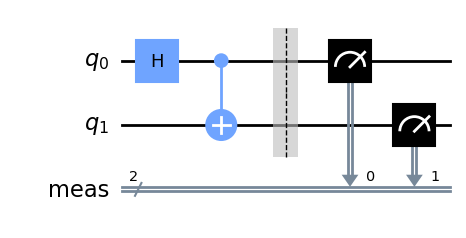

In [3]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.measure_all()
qc.draw('mpl')

In [4]:
job = Sampler(session='ibmq_qasm_simulator').run(qc)

In [5]:
job.result()

SamplerResult(quasi_dists=[{0: 0.4915, 3: 0.5085}], metadata=[{'shots': 4000}])

In [6]:
counts = job.result().quasi_dists[0].binary_probabilities()

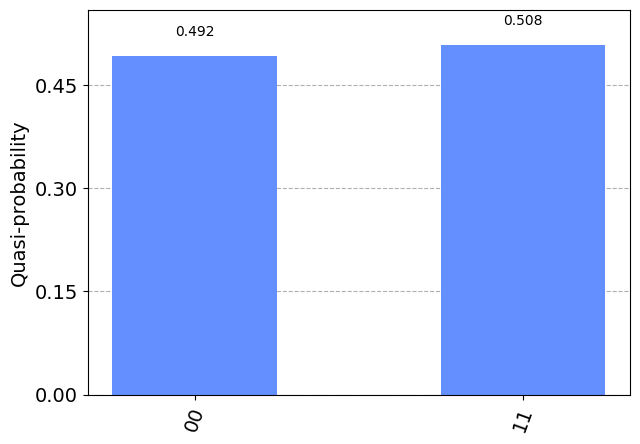

In [7]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [8]:
backend = service.get_backend('ibmq_qasm_simulator')
with Session(service=service, backend = backend) as session:
    sampler = Sampler()
    job = sampler.run(circuits=qc)

In [9]:
result = job.result()

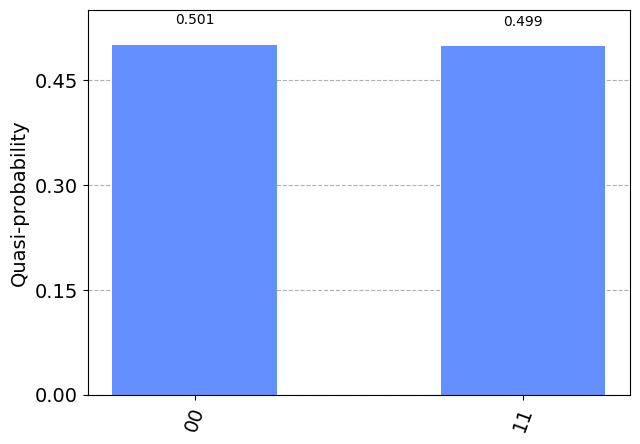

In [10]:
plot_histogram(result.quasi_dists[0].binary_probabilities())

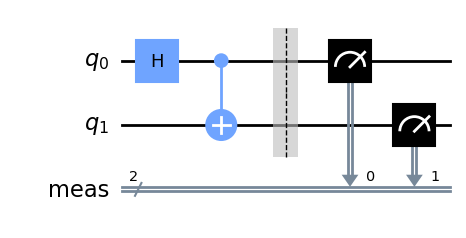

In [11]:
job.inputs['circuits'][0].draw('mpl')

In [12]:
print(job.logs())

{"status": "Completed", "reason": null, "reason_code": null}


In [13]:
from qiskit.opflow.primitive_ops import PauliOp
import numpy as np


In [14]:
import qiskit

In [15]:
print(qiskit.__version__)

0.25.0
